# Marcin Maleńczuk

## Laboratorium 3

In [12]:
function naive_multiplication(A,B)
    C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [13]:
function better_multiplication( A,B )
    C=zeros(Float64,size(A,1),size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [ ]:
using Plots
using Base.GC

x = 100:100:1000
iter = 1:1:10


open("j_lab3.csv", "w+") do file
    write(file, "size,naive,better,blas\n")
    
    for n = x
        for i = iter
            A = rand(n, n)
            B = rand(n, n)
            naiveT = @elapsed naive_multiplication(A, B)
            betterT = @elapsed better_multiplication(A, B)
            nativeT = @elapsed (A * B)
            
            write(file, "$n,$naiveT,$betterT,$nativeT\n")
        end
    end
end

In [14]:
using CSV
using Plots
using DataFrames


function scatter_csv(chart, file, n1, n2 ,n3)
    data = CSV.read(file)
    
    chart = scatter!(data[:size], data[:naive_mean], 
        labels =n1,
        yerr = data[:naive_std])
    
    chart = scatter!(data[:size], data[:better_mean],
        labels =n2,
        yerr = data[:better_std])

    chart = scatter!(data[:size], data[:blas_mean],
        labels =n3,
        yerr = data[:blas_std])
    
    chart
end

scatter_csv (generic function with 1 method)

### 1 - Julia

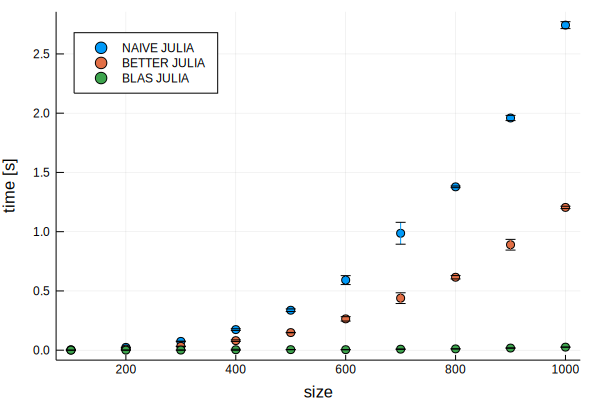

In [15]:
j_chart = scatter(xlabel = "size",ylabel = "time [s]", legend=:topleft)
scatter_csv(j_chart, "j_lab3.csv", "NAIVE JULIA", "BETTER JULIA", "BLAS JULIA")

### 2 - C without optimalization

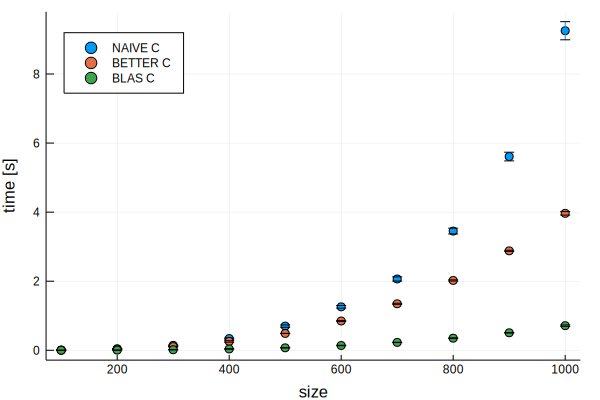

In [16]:
c_chart = scatter(xlabel = "size",ylabel = "time [s]", legend=:topleft)
scatter_csv(c_chart, "c_lab3.csv", "NAIVE C", "BETTER C", "BLAS C")

### 2 - C with optimalization

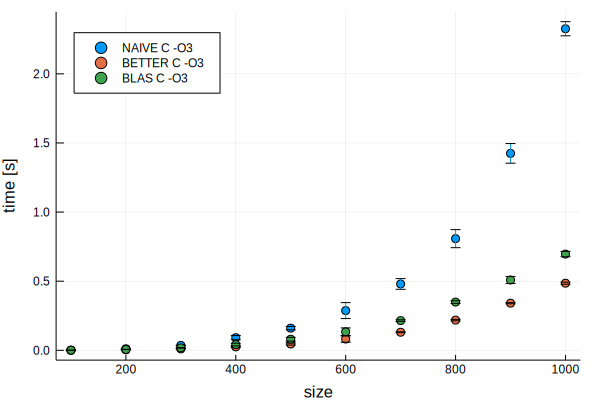

In [17]:
co_chart = scatter(xlabel = "size",ylabel = "time [s]", legend=:topleft)
scatter_csv(co_chart, "co_lab3.csv", "NAIVE C -O3", "BETTER C -O3", "BLAS C -O3")

### 3 - Przybliżenie wielomianami

In [18]:
using Polynomials

function plot_approximation(chart, file, n1, n2 ,n3)
    data = CSV.read(file)
    naive_approx = polyfit(data[:size], data[:naive_mean], 3)
    better_approx = polyfit(data[:size], data[:better_mean], 3)
    blas_approx = polyfit(data[:size], data[:blas_mean], 3)
    
    
    
    chart = plot!(data[:size], polyval(naive_approx, data[:size]), 
        labels =n1)
    
    chart = plot!(data[:size], polyval(better_approx, data[:size]),
        labels =n2)

    chart = plot!(data[:size], polyval(blas_approx, data[:size]),
        labels =n3)
    
    chart
end

plot_approximation (generic function with 1 method)

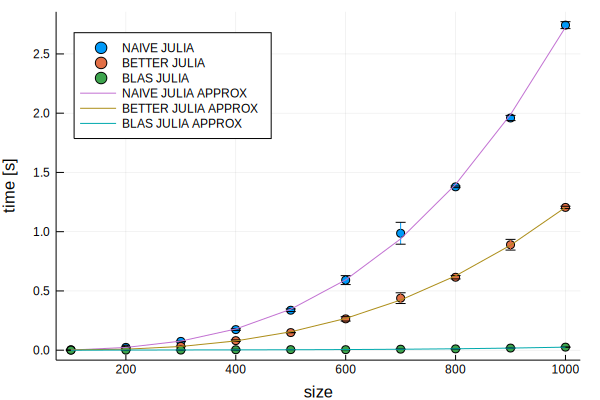

In [19]:
j_chart = plot(xlabel = "size",ylabel = "time [s]", legend=:topleft)
scatter_csv(j_chart, "j_lab3.csv", "NAIVE JULIA", "BETTER JULIA", "BLAS JULIA")
plot_approximation(j_chart, "j_lab3.csv", "NAIVE JULIA APPROX", "BETTER JULIA APPROX", "BLAS JULIA APPROX")

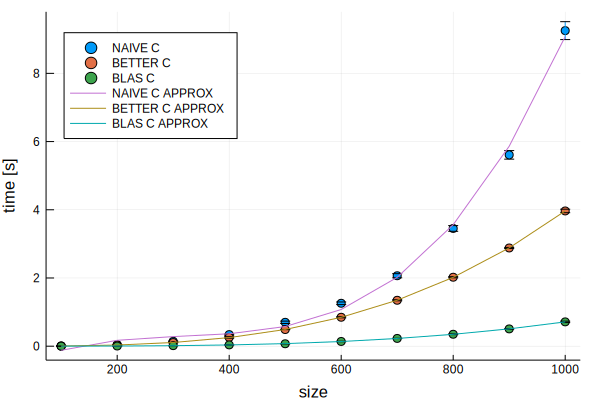

In [20]:
c_chart = plot(xlabel = "size",ylabel = "time [s]", legend=:topleft)
scatter_csv(c_chart, "c_lab3.csv", "NAIVE C", "BETTER C", "BLAS C")
plot_approximation(c_chart, "c_lab3.csv", "NAIVE C APPROX", "BETTER C APPROX", "BLAS C APPROX")

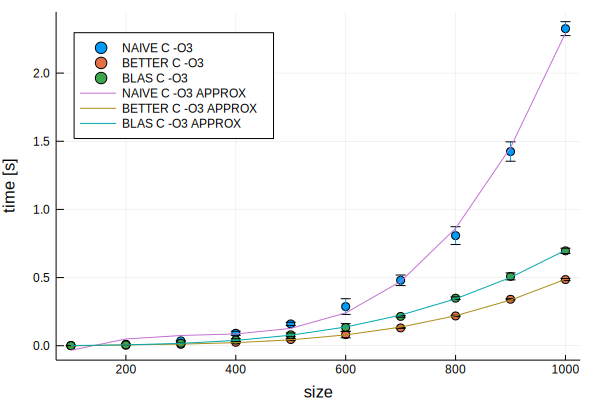

In [21]:
co_chart = plot(xlabel = "size",ylabel = "time [s]", legend=:topleft)
scatter_csv(co_chart, "co_lab3.csv", "NAIVE C -O3", "BETTER C -O3", "BLAS C -O3")
plot_approximation(co_chart, "co_lab3.csv", "NAIVE C -O3 APPROX", "BETTER C -O3 APPROX", "BLAS C -O3 APPROX")

## 4 - Porównanie Julia vs C
Julia Blas jest najszybsza z nich wszystkich

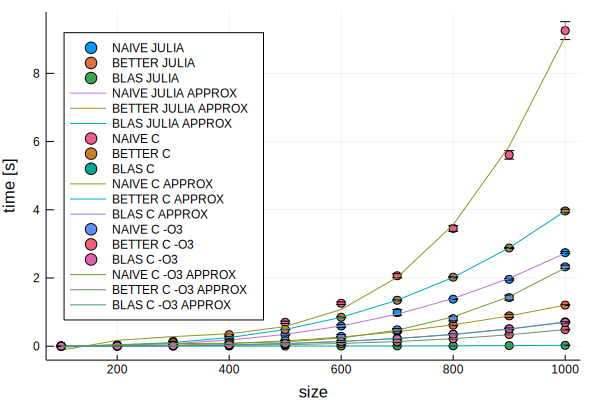

In [22]:
chart = plot(xlabel = "size",ylabel = "time [s]", legend=:topleft)
scatter_csv(chart, "j_lab3.csv", "NAIVE JULIA", "BETTER JULIA", "BLAS JULIA")
plot_approximation(chart, "j_lab3.csv", "NAIVE JULIA APPROX", "BETTER JULIA APPROX", "BLAS JULIA APPROX")
scatter_csv(chart, "c_lab3.csv", "NAIVE C", "BETTER C", "BLAS C")
plot_approximation(chart, "c_lab3.csv", "NAIVE C APPROX", "BETTER C APPROX", "BLAS C APPROX")
scatter_csv(chart, "co_lab3.csv", "NAIVE C -O3", "BETTER C -O3", "BLAS C -O3")
plot_approximation(chart, "co_lab3.csv", "NAIVE C -O3 APPROX", "BETTER C -O3 APPROX", "BLAS C -O3 APPROX")